In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

from warnings import filterwarnings
sns.set_theme()
filterwarnings("ignore")

In [7]:
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


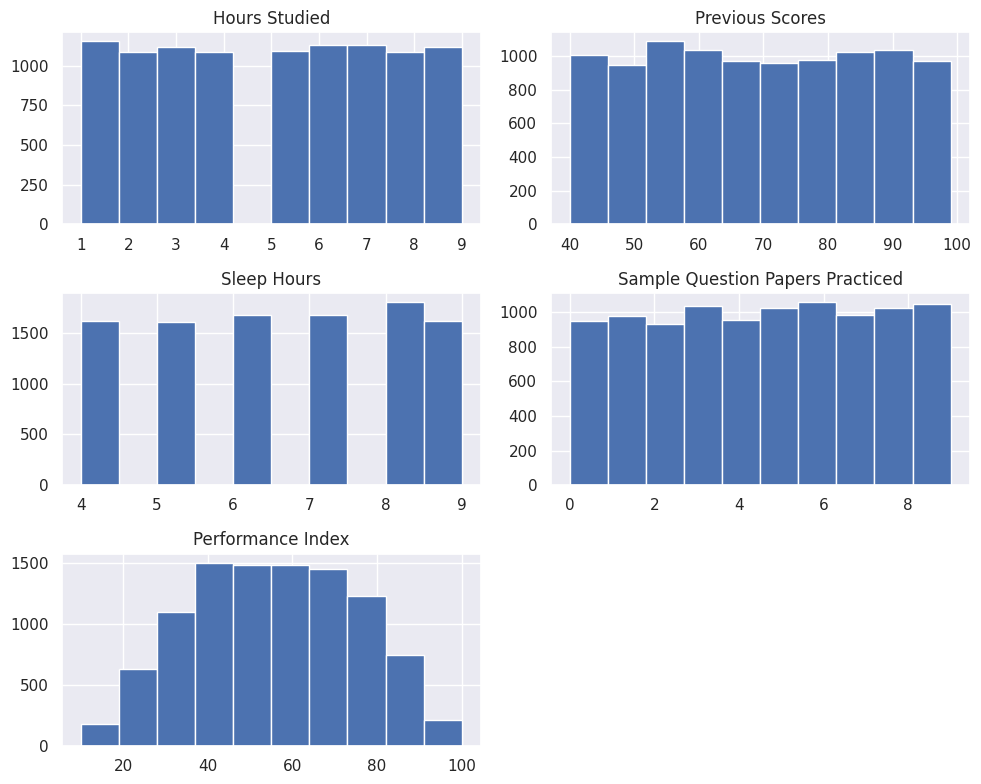

In [13]:
pd.get_dummies(df).hist(figsize=(10,8))
plt.tight_layout()
plt.show()

In [17]:
df = pd.get_dummies(df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
 5   Extracurricular Activities_No     10000 non-null  bool   
 6   Extracurricular Activities_Yes    10000 non-null  bool   
dtypes: bool(2), float64(1), int64(4)
memory usage: 410.3 KB


<Axes: >

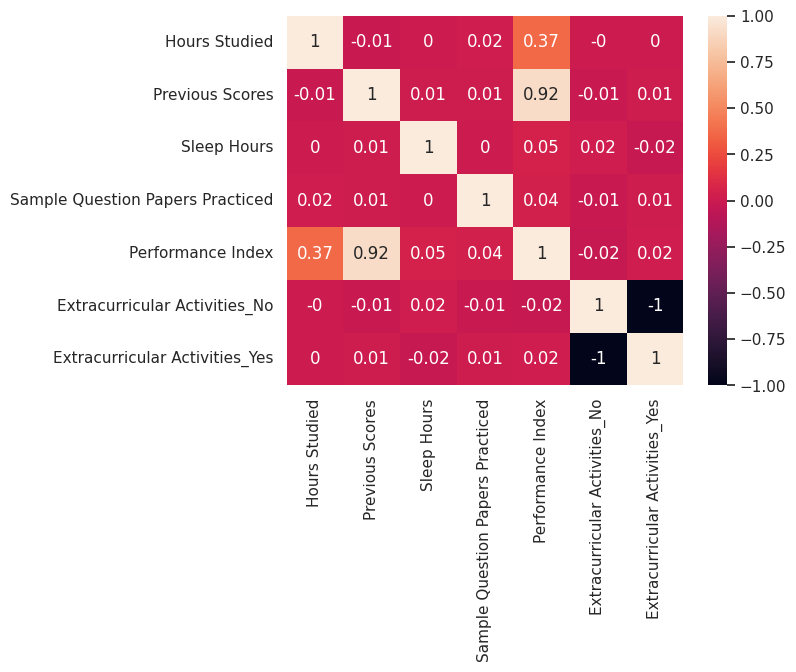

In [22]:
sns.heatmap(df.corr().round(2), annot=True)

In [23]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index',
       'Extracurricular Activities_No', 'Extracurricular Activities_Yes'],
      dtype='object')

In [32]:
features_list = ['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced',
       'Extracurricular Activities_No', 'Extracurricular Activities_Yes'
]
X = df[features_list]
y = df["Performance Index"]

In [34]:
scaler = StandardScaler()
scaled_features_df = pd.DataFrame(scaler.fit_transform(X), columns=features_list)
scaled_features_df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_No,Extracurricular Activities_Yes
0,0.775188,1.704176,1.456205,-1.249754,-1.010455,1.010455
1,-0.383481,0.723913,-1.492294,-0.900982,0.989654,-0.989654
2,1.161410,-1.063626,0.276805,-0.900982,-1.010455,1.010455
3,0.002742,-1.005963,-0.902594,-0.900982,-1.010455,1.010455
4,0.775188,0.320275,0.866505,0.145333,0.989654,-0.989654


In [51]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, y, train_size=0.8, random_state=42)

In [52]:
grid = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions={
        "n_estimators": range(100, 501, 100),
        "max_depth": range(1, 6, 1),
        "min_samples_split": range(10, 51, 10),
        "min_samples_leaf": range(10, 51, 10),
    },
    cv=5
)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 3}


In [53]:
model = GradientBoostingRegressor(**grid.best_params_)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [57]:
mse = mean_squared_error(y_true=y_test, y_pred=pred)
mae = mean_absolute_error(y_true=y_test, y_pred=pred)
mae, mse

(1.6403026768041622, 4.29029255305311)

In [58]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [59]:
df["Performance Index"].mean()

np.float64(55.2248)